In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [14]:
tesla_stock_data = pd.read_csv('TSLA_all_supported_frames.csv')

In [15]:
tesla_stock_data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1min
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1min
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1min
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1min
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1min


In [16]:
tesla_stock_data.tail()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame
32352,11/30/2010 0:00,21.94,36.00,21.05,35.330,28315100,Monthly
32353,10/29/2010 0:00,20.69,21.87,20.00,21.840,6547800,Monthly
32354,9/30/2010 0:00,19.62,23.16,19.50,20.405,18045900,Monthly
32355,8/31/2010 0:00,20.50,22.18,17.39,19.480,15038200,Monthly
32356,7/30/2010 0:00,25.00,25.92,14.98,19.940,64575800,Monthly


In [18]:
tesla_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32357 entries, 0 to 32356
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32357 non-null  object 
 1   Open        32357 non-null  float64
 2   High        32357 non-null  float64
 3   Low         32357 non-null  float64
 4   Close       32357 non-null  float64
 5   Volume      32357 non-null  int64  
 6   Frame       32357 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
tesla_stock_data.describe()

,Open,High,Low,Close,Volume
count,32357.000000,32357.000000,32357.000000,32357.000000,3.235700e+04
mean,283.799256,285.832134,281.361191,283.847299,9.293756e+06
std,113.052536,117.997792,109.205824,113.382841,8.395515e+07
min,16.140000,16.630000,14.980000,15.800000,5.000000e+00
25%,247.100000,247.700000,244.860000,247.140000,8.214000e+03
50%,262.910200,265.000000,262.150000,262.900000,8.816800e+04
75%,323.530000,324.800000,322.100000,323.510000,5.207090e+05
max,2295.120000,2318.490000,2186.520000,2238.750000,3.897499e+09


In [20]:
tesla_stock_data.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
Frame         0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

tesla_stock_data['Frame_encoded'] = label_encoder.fit_transform(tesla_stock_data['Frame'])

frame_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of Frames to Encoded Values:", frame_mapping)


Mapping of Frames to Encoded Values: {'15min': np.int64(0), '1min': np.int64(1), '30min': np.int64(2), '5min': np.int64(3), '60min': np.int64(4), 'Daily': np.int64(5), 'Monthly': np.int64(6), 'Weekly': np.int64(7)}


In [22]:
tesla_stock_data.info

<bound method DataFrame.info of              Unnamed: 0    Open    High     Low    Close    Volume    Frame  \
0      11/19/2024 19:59  344.91  345.00  344.91  344.990     10210     1min   
1      11/19/2024 19:58  345.04  345.05  344.90  344.990      5771     1min   
2      11/19/2024 19:57  345.02  345.08  344.81  345.040      5140     1min   
3      11/19/2024 19:56  345.03  345.04  345.00  345.010      1799     1min   
4      11/19/2024 19:55  345.00  345.08  345.00  345.000      2259     1min   
...                 ...     ...     ...     ...      ...       ...      ...   
32352   11/30/2010 0:00   21.94   36.00   21.05   35.330  28315100  Monthly   
32353   10/29/2010 0:00   20.69   21.87   20.00   21.840   6547800  Monthly   
32354    9/30/2010 0:00   19.62   23.16   19.50   20.405  18045900  Monthly   
32355    8/31/2010 0:00   20.50   22.18   17.39   19.480  15038200  Monthly   
32356    7/30/2010 0:00   25.00   25.92   14.98   19.940  64575800  Monthly   

       Frame_encode

In [23]:
tesla_stock_data.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame,Frame_encoded
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1min,1
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1min,1
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1min,1
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1min,1
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1min,1


In [24]:
tesla_stock_data = tesla_stock_data.drop(columns=['Frame'])
tesla_stock_data.head()


,Unnamed: 0,Open,High,Low,Close,Volume,Frame_encoded
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1


In [25]:
# Rename and convert DateTime column
tesla_stock_data = tesla_stock_data.rename(columns={'Unnamed: 0': 'DateTime'})
tesla_stock_data['DateTime'] = pd.to_datetime(tesla_stock_data['DateTime'])
tesla_stock_data.head()

,DateTime,Open,High,Low,Close,Volume,Frame_encoded
0,2024-11-19 19:59:00,344.91,345.00,344.91,344.99,10210,1
1,2024-11-19 19:58:00,345.04,345.05,344.90,344.99,5771,1
2,2024-11-19 19:57:00,345.02,345.08,344.81,345.04,5140,1
3,2024-11-19 19:56:00,345.03,345.04,345.00,345.01,1799,1
4,2024-11-19 19:55:00,345.00,345.08,345.00,345.00,2259,1


In [26]:
# Add additional features
tesla_stock_data['Day_of_week'] = tesla_stock_data['DateTime'].dt.dayofweek
tesla_stock_data['Month'] = tesla_stock_data['DateTime'].dt.month
tesla_stock_data['Hour'] = tesla_stock_data['DateTime'].dt.hour
tesla_stock_data.tail()

,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour
32352,2010-11-30,21.94,36.00,21.05,35.330,28315100,6,1,11,0
32353,2010-10-29,20.69,21.87,20.00,21.840,6547800,6,4,10,0
32354,2010-09-30,19.62,23.16,19.50,20.405,18045900,6,3,9,0
32355,2010-08-31,20.50,22.18,17.39,19.480,15038200,6,1,8,0
32356,2010-07-30,25.00,25.92,14.98,19.940,64575800,6,4,7,0


In [27]:
# Split data by frame
# frames = ['Daily', 'Weekly', 'Monthly', '1min', '5min', '15min', '30min', '60min']
data_by_frame = {}
for frame, encoded_value in frame_mapping.items():
    frame_data = tesla_stock_data[tesla_stock_data['Frame_encoded'] == encoded_value]
    frame_data = frame_data.sort_values(by='DateTime')
    data_by_frame[frame] = frame_data
    print(f"{frame} Data: {frame_data.shape}")

15min Data: (1408, 10)
1min Data: (21120, 10)
30min Data: (704, 10)
5min Data: (4224, 10)
60min Data: (352, 10)
Daily Data: (3625, 10)
Monthly Data: (173, 10)
Weekly Data: (751, 10)


In [29]:
tesla_stock_data.info

<bound method DataFrame.info of                  DateTime    Open    High     Low    Close    Volume  \
0     2024-11-19 19:59:00  344.91  345.00  344.91  344.990     10210   
1     2024-11-19 19:58:00  345.04  345.05  344.90  344.990      5771   
2     2024-11-19 19:57:00  345.02  345.08  344.81  345.040      5140   
3     2024-11-19 19:56:00  345.03  345.04  345.00  345.010      1799   
4     2024-11-19 19:55:00  345.00  345.08  345.00  345.000      2259   
...                   ...     ...     ...     ...      ...       ...   
32352 2010-11-30 00:00:00   21.94   36.00   21.05   35.330  28315100   
32353 2010-10-29 00:00:00   20.69   21.87   20.00   21.840   6547800   
32354 2010-09-30 00:00:00   19.62   23.16   19.50   20.405  18045900   
32355 2010-08-31 00:00:00   20.50   22.18   17.39   19.480  15038200   
32356 2010-07-30 00:00:00   25.00   25.92   14.98   19.940  64575800   

       Frame_encoded  Day_of_week  Month  Hour  
0                  1            1     11    19  
1    

In [30]:
def apply_robust_scaler(df, column):
    scaler = RobustScaler()
    df[f"{column}_scaled"] = scaler.fit_transform(df[[column]])
    return df

In [31]:
for frame, frame_data in data_by_frame.items():
    if 'Volume' in frame_data.columns:
        frame_data['Volume_log'] = np.log1p(frame_data['Volume'])
        frame_data = apply_robust_scaler(frame_data, 'Volume_log')
        data_by_frame[frame] = frame_data

In [33]:
print("Daily Data (Sorted by DateTime):")
daily_data = data_by_frame['Daily'].sort_values(by='DateTime')
daily_data.head()

Daily Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
31432,2010-06-29,19.00,25.0000,17.54,23.89,18766300,5,1,6,0,16.747573,0.473192
31431,2010-06-30,25.79,30.4192,23.30,23.83,17187100,5,2,6,0,16.659670,0.428848
31430,2010-07-01,25.00,25.9200,20.27,21.96,8218800,5,3,7,0,15.921935,0.056688
31429,2010-07-02,23.00,23.1000,18.71,19.20,5139800,5,4,7,0,15.452525,-0.180111
31428,2010-07-06,20.00,20.0000,15.83,16.11,6866900,5,1,7,0,15.742223,-0.033969


In [34]:

print("Monthly Data (Sorted by DateTime):")
monthly_data = data_by_frame['Monthly'].sort_values(by='DateTime')
monthly_data.head()

Monthly Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
32356,2010-07-30,25.00,25.92,14.98,19.940,64575800,6,4,7,0,17.983350,-0.528968
32355,2010-08-31,20.50,22.18,17.39,19.480,15038200,6,1,8,0,16.526104,-1.349562
32354,2010-09-30,19.62,23.16,19.50,20.405,18045900,6,3,9,0,16.708429,-1.246892
32353,2010-10-29,20.69,21.87,20.00,21.840,6547800,6,4,10,0,15.694640,-1.817770
32352,2010-11-30,21.94,36.00,21.05,35.330,28315100,6,1,11,0,17.158906,-0.993223


In [35]:
print("1min Data (Sorted by DateTime):")
one_min_data = data_by_frame['1min'].sort_values(by='DateTime')
one_min_data.head()

1min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
21119,2024-10-21 04:00:00,219.70,221.00,219.25,219.70,11517,1,0,10,4,9.351666,-0.202133
21118,2024-10-21 04:01:00,219.69,219.70,219.47,219.65,4380,1,0,10,4,8.385032,-0.470943
21117,2024-10-21 04:02:00,219.68,219.83,219.60,219.72,4658,1,0,10,4,8.446556,-0.453834
21116,2024-10-21 04:03:00,219.73,219.77,219.60,219.70,3316,1,0,10,4,8.106816,-0.548312
21115,2024-10-21 04:04:00,219.62,219.69,219.20,219.41,11845,1,0,10,4,9.379746,-0.194325


In [37]:
print("5min Data (Sorted by DateTime):")
five_min_data = data_by_frame['5min'].sort_values(by='DateTime')
five_min_data.head()

5min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
25343,2024-10-21 04:00:00,219.70,221.00,219.20,219.41,35716,3,0,10,4,10.483382,-0.371666
25342,2024-10-21 04:05:00,219.44,219.49,219.06,219.14,19114,3,0,10,4,9.858229,-0.547286
25341,2024-10-21 04:10:00,219.10,219.35,219.00,219.07,19198,3,0,10,4,9.862613,-0.546054
25340,2024-10-21 04:15:00,219.16,219.21,219.00,219.13,18472,3,0,10,4,9.824065,-0.556883
25339,2024-10-21 04:20:00,219.15,219.27,219.08,219.15,7380,3,0,10,4,8.906664,-0.814603


In [38]:
print("15min Data (Sorted by DateTime):")
fifteen_min_data = data_by_frame['15min'].sort_values(by='DateTime')
fifteen_min_data.head()

15min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
26751,2024-10-21 04:00:00,219.70,221.00,219.00,219.07,74028,0,0,10,4,11.212212,-0.537976
26750,2024-10-21 04:15:00,219.16,219.27,219.00,219.11,32438,0,0,10,4,10.387117,-0.772070
26749,2024-10-21 04:30:00,219.11,219.54,219.00,219.34,33414,0,0,10,4,10.416760,-0.763660
26748,2024-10-21 04:45:00,219.39,219.48,219.13,219.34,21717,0,0,10,4,9.985897,-0.885903
26747,2024-10-21 05:00:00,219.32,219.40,219.26,219.28,14836,0,0,10,5,9.604879,-0.994005


In [39]:
print("30min Data (Sorted by DateTime):")
thirty_min_data = data_by_frame['30min'].sort_values(by='DateTime')
thirty_min_data.head()

30min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
27455,2024-10-21 04:00:00,219.70,221.00,219.00,219.11,106466,2,0,10,4,11.575590,-0.646422
27454,2024-10-21 04:30:00,219.11,219.54,219.00,219.34,55131,2,0,10,4,10.917486,-0.832271
27453,2024-10-21 05:00:00,219.32,219.40,219.00,219.04,45703,2,0,10,5,10.729941,-0.885234
27452,2024-10-21 05:30:00,219.00,219.20,218.84,218.95,56004,2,0,10,5,10.933196,-0.827834
27451,2024-10-21 06:00:00,218.96,219.16,218.75,219.07,67447,2,0,10,6,11.119112,-0.775332


In [44]:
print("60min Data (Sorted by DateTime):")
sixty_min_data = data_by_frame['60min'].sort_values(by='DateTime')
sixty_min_data.head()

60min Data (Sorted by DateTime):


,DateTime,Open,High,Low,Close,Volume,Frame_encoded,Day_of_week,Month,Hour,Volume_log,Volume_log_scaled
27807,2024-10-21 04:00:00,219.7000,221.00,219.0000,219.3400,161597,4,0,10,4,11.992867,-0.957589
27806,2024-10-21 05:00:00,219.3200,219.40,218.8400,218.9500,101707,4,0,10,5,11.529861,-1.096112
27805,2024-10-21 06:00:00,218.9600,219.19,218.1500,218.2400,167347,4,0,10,6,12.027831,-0.947128
27804,2024-10-21 07:00:00,218.2400,218.70,217.5500,217.8900,323190,4,0,10,7,12.685999,-0.750215
27803,2024-10-21 08:00:00,220.0817,220.70,217.5383,218.0517,637269,4,0,10,8,13.364949,-0.547084


In [43]:
# Save preprocessed data
for frame, frame_data in data_by_frame.items():
    frame_data.to_csv(f'data/processed/{frame}_preprocessed.csv', index=False)


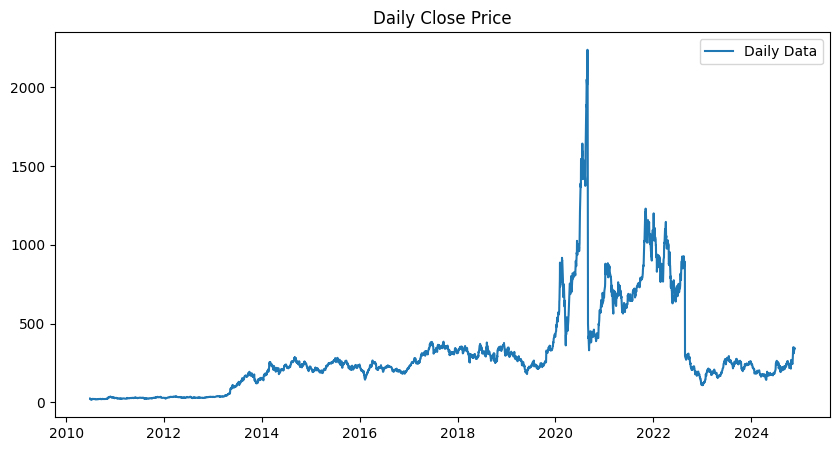

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['Daily']['DateTime'], data_by_frame['Daily']['Close'], label='Daily Data')
plt.title('Daily Close Price')
plt.legend()
plt.show()

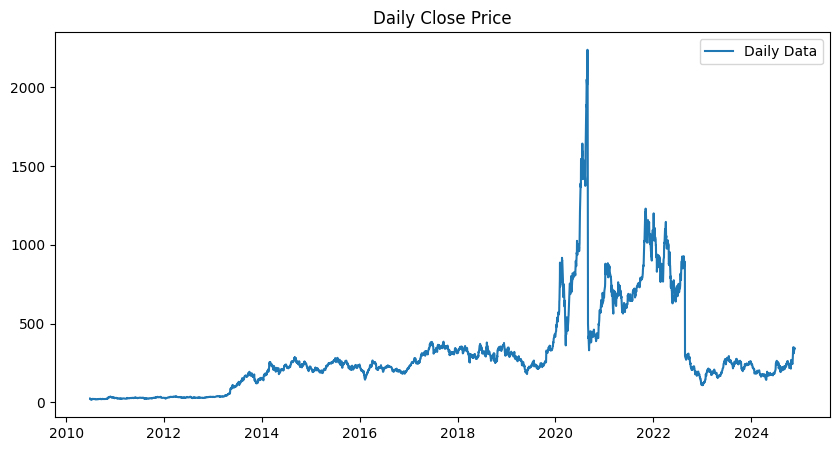

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['Daily']['DateTime'], data_by_frame['Daily']['Close'], label='Daily Data')
plt.title('Daily Close Price')
plt.legend()
plt.show()

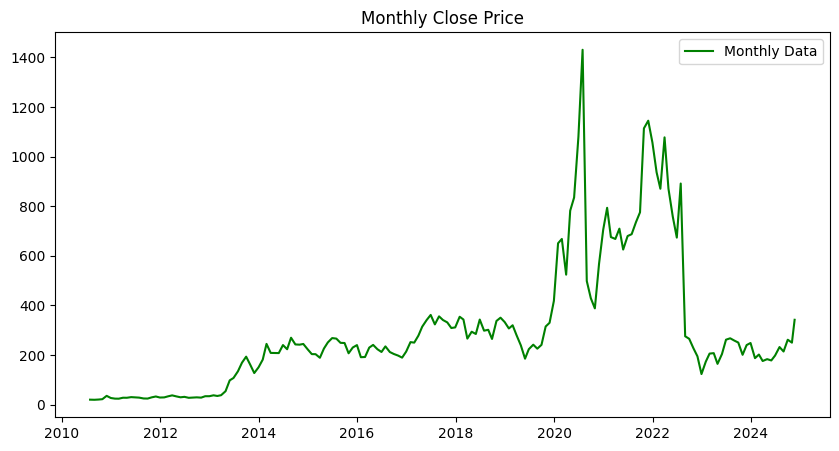

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['Monthly']['DateTime'], data_by_frame['Monthly']['Close'], label='Monthly Data', color='green')
plt.title('Monthly Close Price')
plt.legend()
plt.show()

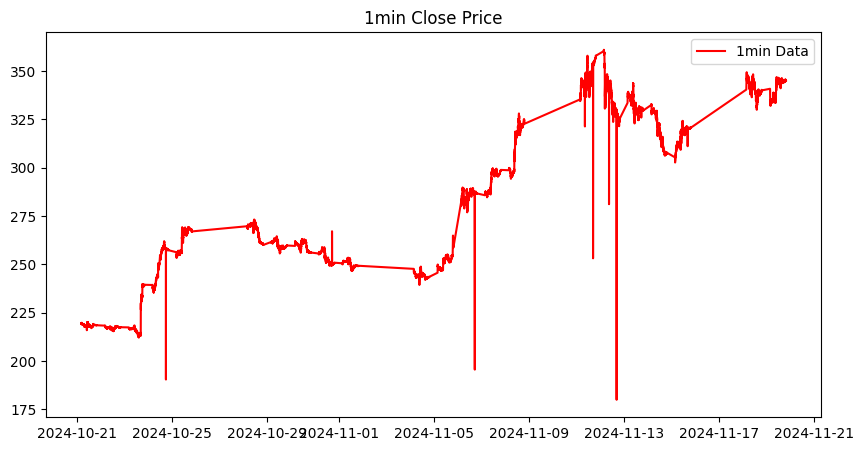

In [48]:

plt.figure(figsize=(10, 5))
plt.plot(data_by_frame['1min']['DateTime'], data_by_frame['1min']['Close'], label='1min Data' ,color = 'red')
plt.title('1min Close Price')
plt.legend()
plt.show()

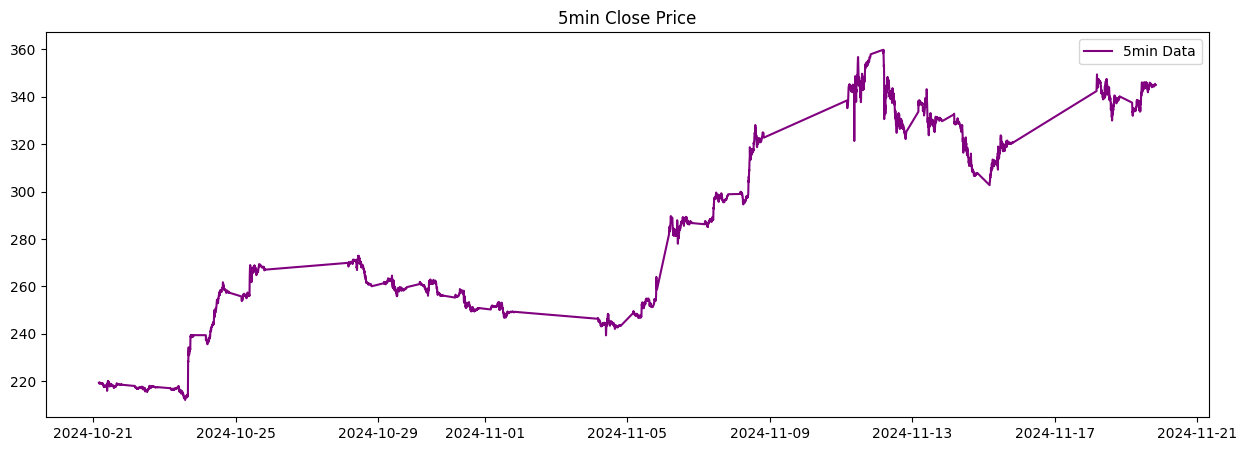

In [49]:
plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['5min']['DateTime'], data_by_frame['5min']['Close'], label='5min Data', color='purple')
plt.title('5min Close Price')
plt.legend()
plt.show()

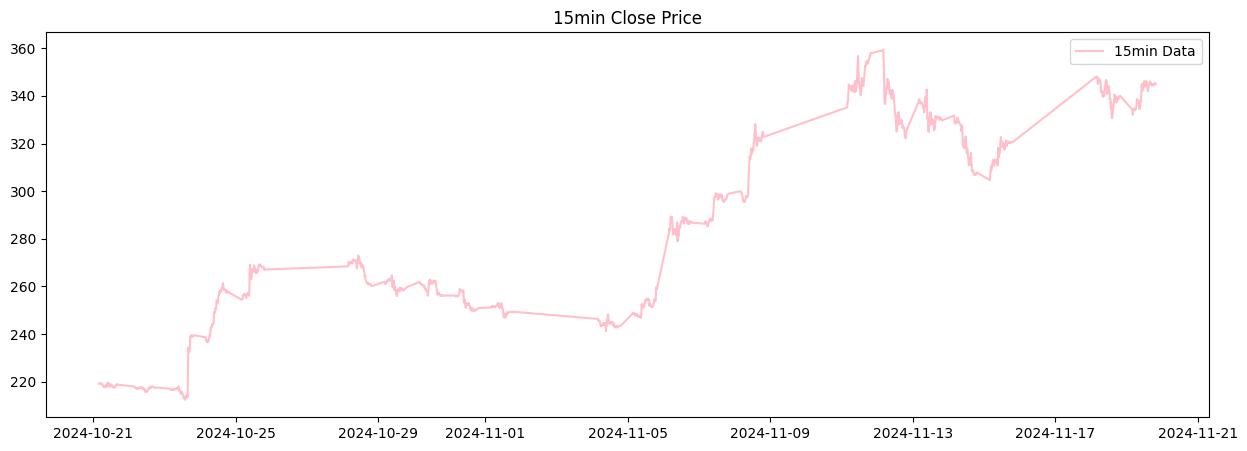

In [50]:

plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['15min']['DateTime'], data_by_frame['15min']['Close'], label='15min Data', color='pink')
plt.title('15min Close Price')
plt.legend()
plt.show()

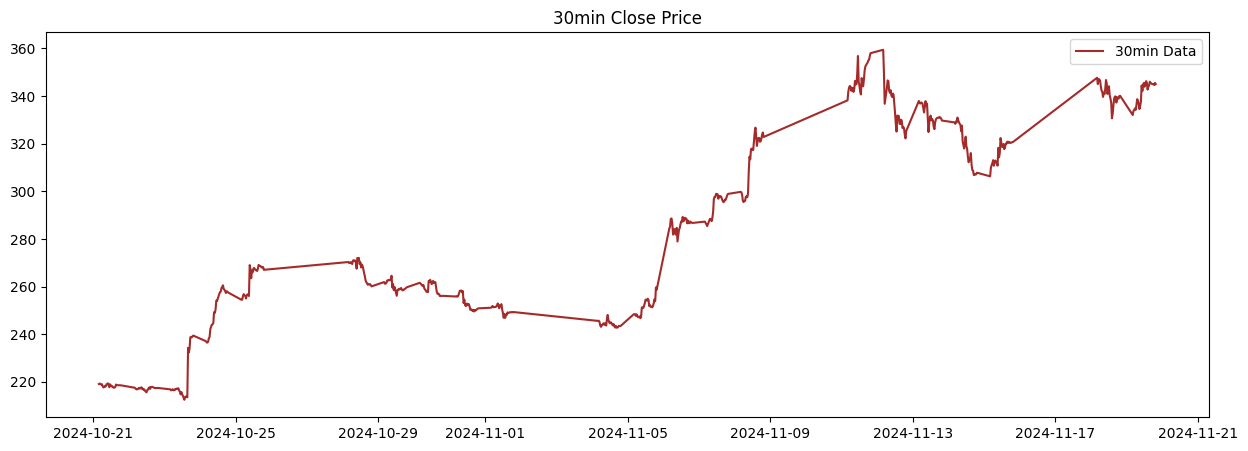

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['30min']['DateTime'], data_by_frame['30min']['Close'], label='30min Data', color='brown')
plt.title('30min Close Price')
plt.legend()
plt.show()

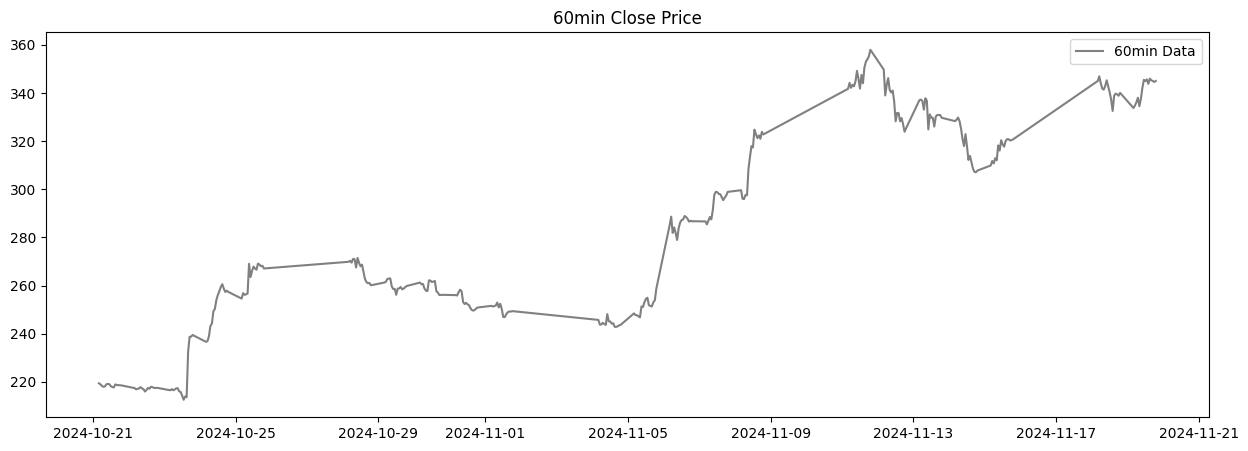

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(data_by_frame['60min']['DateTime'], data_by_frame['60min']['Close'], label='60min Data', color='gray')
plt.title('60min Close Price')
plt.legend()
plt.show()

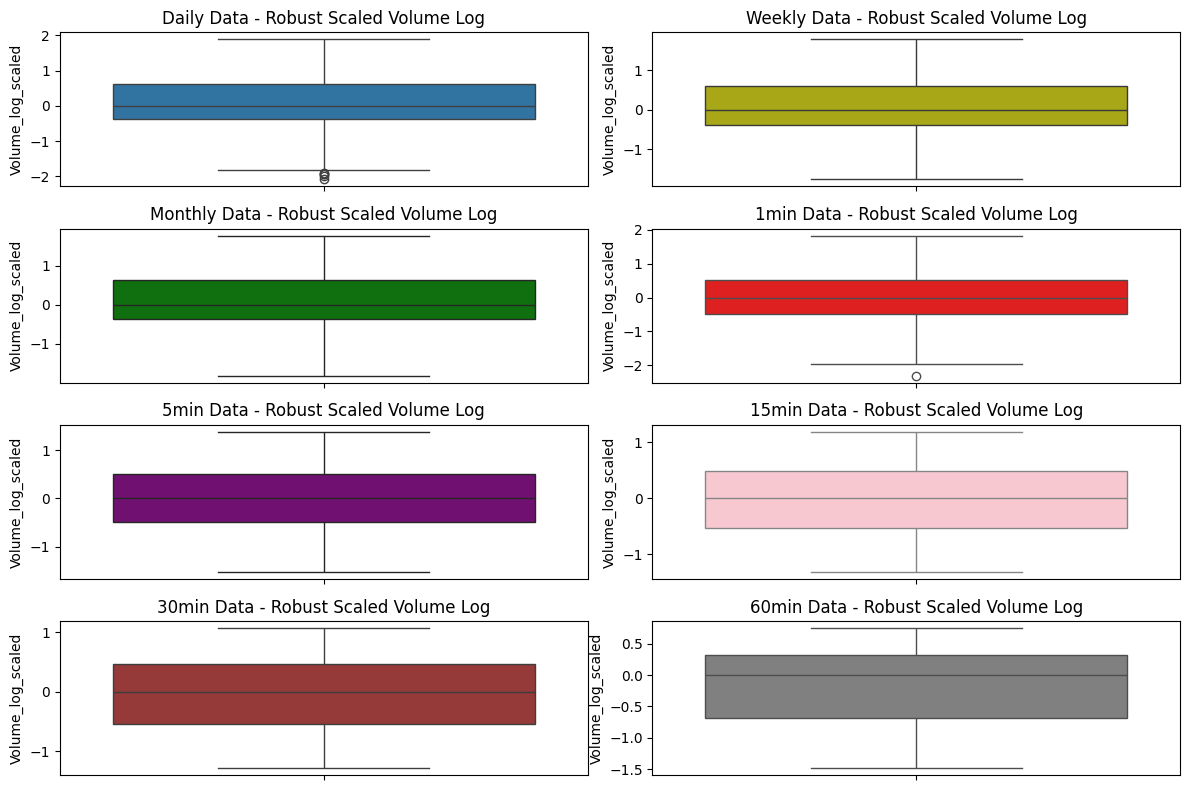

In [53]:
plt.figure(figsize=(12, 8))


plt.subplot(4, 2, 1)
sns.boxplot(data=data_by_frame['Daily']['Volume_log_scaled'])
plt.title('Daily Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 2)
sns.boxplot(data=data_by_frame['Weekly']['Volume_log_scaled'], color='y')
plt.title('Weekly Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 3)
sns.boxplot(data=data_by_frame['Monthly']['Volume_log_scaled'], color='g')
plt.title('Monthly Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 4)
sns.boxplot(data=data_by_frame['1min']['Volume_log_scaled'] , color='red')
plt.title('1min Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 5)
sns.boxplot(data=data_by_frame['5min']['Volume_log_scaled'], color='purple')
plt.title('5min Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 6)
sns.boxplot(data=data_by_frame['15min']['Volume_log_scaled'], color='pink')
plt.title('15min Data - Robust Scaled Volume Log')


plt.subplot(4, 2, 7)
sns.boxplot(data=data_by_frame['30min']['Volume_log_scaled'], color='brown')
plt.title('30min Data - Robust Scaled Volume Log')

plt.subplot(4, 2, 8)
sns.boxplot(data=data_by_frame['60min']['Volume_log_scaled'], color='gray')
plt.title('60min Data - Robust Scaled Volume Log')



plt.tight_layout()
plt.show()

In [55]:
tesla_stock_data.info

<bound method DataFrame.info of                  DateTime    Open    High     Low    Close    Volume  \
0     2024-11-19 19:59:00  344.91  345.00  344.91  344.990     10210   
1     2024-11-19 19:58:00  345.04  345.05  344.90  344.990      5771   
2     2024-11-19 19:57:00  345.02  345.08  344.81  345.040      5140   
3     2024-11-19 19:56:00  345.03  345.04  345.00  345.010      1799   
4     2024-11-19 19:55:00  345.00  345.08  345.00  345.000      2259   
...                   ...     ...     ...     ...      ...       ...   
32352 2010-11-30 00:00:00   21.94   36.00   21.05   35.330  28315100   
32353 2010-10-29 00:00:00   20.69   21.87   20.00   21.840   6547800   
32354 2010-09-30 00:00:00   19.62   23.16   19.50   20.405  18045900   
32355 2010-08-31 00:00:00   20.50   22.18   17.39   19.480  15038200   
32356 2010-07-30 00:00:00   25.00   25.92   14.98   19.940  64575800   

       Frame_encoded  Day_of_week  Month  Hour  
0                  1            1     11    19  
1    

Correlation Matrix for 15min Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.904811  0.888826  0.868967  0.904729  0.087705   
Open               0.904811  1.000000  0.984651  0.943179  0.999393  0.168152   
High               0.888826  0.984651  1.000000  0.898974  0.984769  0.168756   
Low                0.868967  0.943179  0.898974  1.000000  0.942660  0.157909   
Close              0.904729  0.999393  0.984769  0.942660  1.000000  0.171902   
Volume             0.087705  0.168152  0.168756  0.157909  0.171902  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week       -0.011286  0.000572  0.001906  0.012337  0.001849  0.065005   
Month              0.850188  0.692320  0.677743  0.663584  0.692806  0.083778   
Hour               0.021649  0.018555  0.029796 -0.023156  0.018346  0.035855   
Volume_log         0.146714  0.219299  0.219286  0.206531  0.221146  0.73

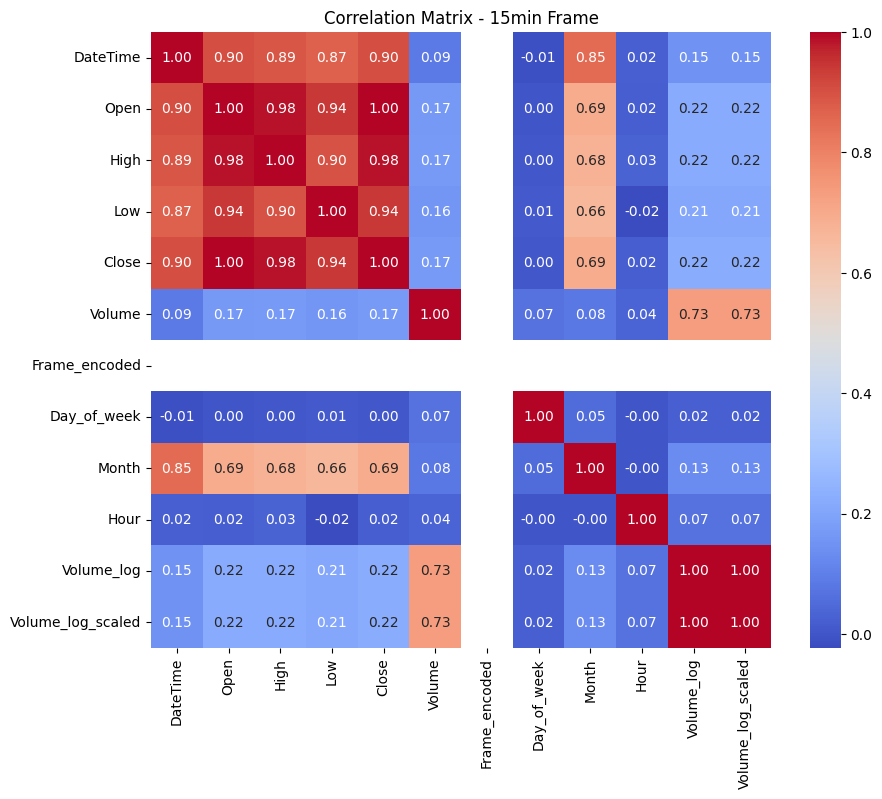

Correlation Matrix for 1min Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.904491  0.902440  0.897268  0.904200  0.050201   
Open               0.904491  1.000000  0.997597  0.988152  0.998794  0.097339   
High               0.902440  0.997597  1.000000  0.982328  0.997160  0.098549   
Low                0.897268  0.988152  0.982328  1.000000  0.989005  0.097049   
Close              0.904200  0.998794  0.997160  0.989005  1.000000  0.097652   
Volume             0.050201  0.097339  0.098549  0.097049  0.097652  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week       -0.011286  0.001250  0.000863  0.004254  0.001301  0.037222   
Month              0.850188  0.692306  0.690164  0.686312  0.691931  0.047972   
Hour               0.021649  0.018378  0.020494  0.008938  0.017979  0.020531   
Volume_log         0.146510  0.221217  0.222747  0.218773  0.221585  0.473

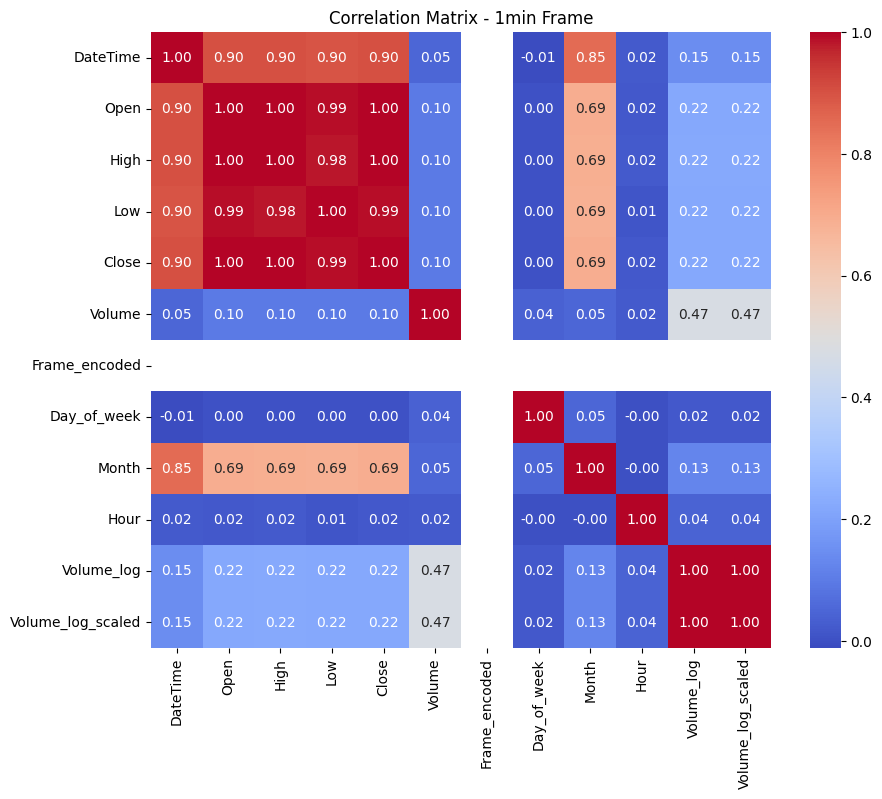

Correlation Matrix for 30min Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.904678  0.874597  0.845079  0.904548  0.094278   
Open               0.904678  1.000000  0.970745  0.906360  0.998659  0.179021   
High               0.874597  0.970745  1.000000  0.825206  0.971276  0.173082   
Low                0.845079  0.906360  0.825206  1.000000  0.905973  0.173525   
Close              0.904548  0.998659  0.971276  0.905973  1.000000  0.185371   
Volume             0.094278  0.179021  0.173082  0.173525  0.185371  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week       -0.011286 -0.000686  0.002217  0.017516  0.001985  0.069836   
Month              0.850189  0.691779  0.664025  0.645306  0.692779  0.090005   
Hour               0.021649  0.019514  0.042028 -0.050928  0.018996  0.038520   
Volume_log         0.147367  0.218116  0.215495  0.196622  0.221159  0.75

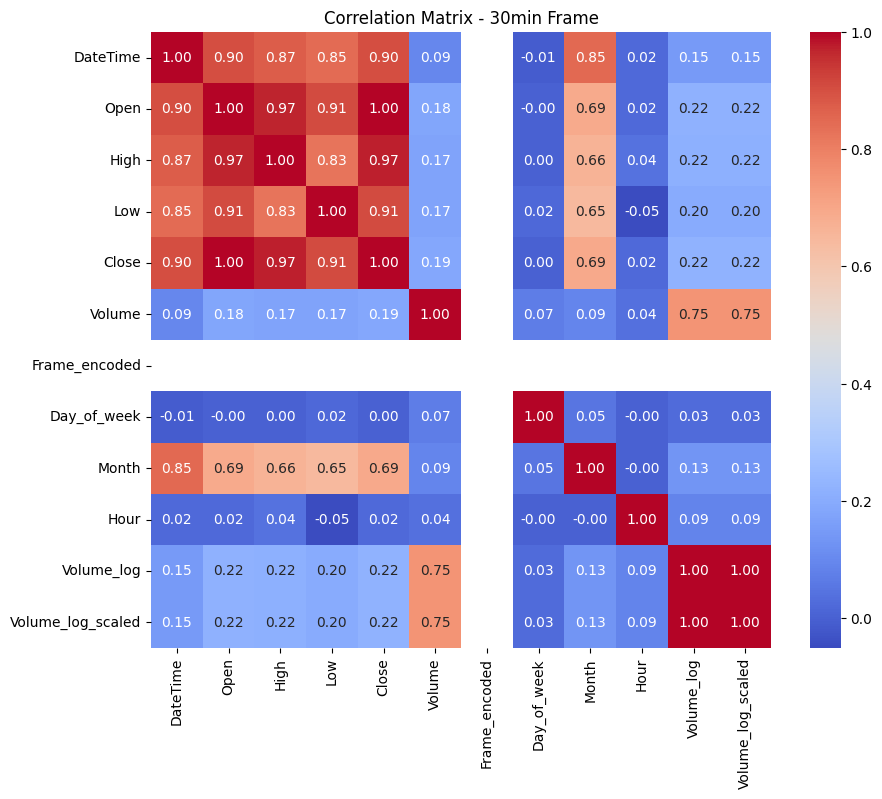

Correlation Matrix for 5min Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.904709  0.897629  0.886791  0.904686  0.075227   
Open               0.904709  1.000000  0.993422  0.971015  0.999694  0.145708   
High               0.897629  0.993422  1.000000  0.951025  0.993445  0.147450   
Low                0.886791  0.971015  0.951025  1.000000  0.970847  0.144940   
Close              0.904686  0.999694  0.993445  0.970847  1.000000  0.147344   
Volume             0.075227  0.145708  0.147450  0.144940  0.147344  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week       -0.011286  0.000976  0.001089  0.008182  0.001374  0.055773   
Month              0.850188  0.692386  0.685694  0.677599  0.692553  0.071880   
Hour               0.021649  0.018739  0.023986 -0.003570  0.018654  0.030763   
Volume_log         0.146828  0.221436  0.223004  0.216868  0.222176  0.667

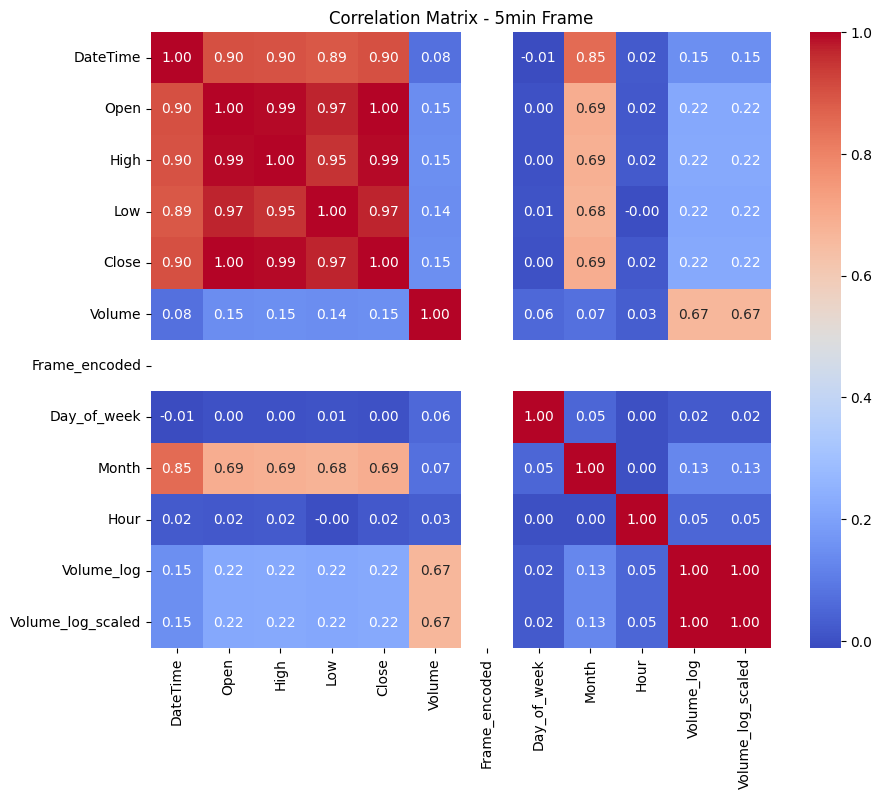

Correlation Matrix for 60min Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.904747  0.854421  0.817958  0.904494  0.113957   
Open               0.904747  1.000000  0.950247  0.866860  0.997589  0.211872   
High               0.854421  0.950247  1.000000  0.727466  0.951028  0.223183   
Low                0.817958  0.866860  0.727466  1.000000  0.865862  0.184274   
Close              0.904494  0.997589  0.951028  0.865862  1.000000  0.222733   
Volume             0.113957  0.211872  0.223183  0.184274  0.222733  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week       -0.011286 -0.001779  0.001952  0.016972  0.003564  0.084456   
Month              0.850189  0.691089  0.646207  0.623999  0.693150  0.108847   
Hour               0.021649  0.020832  0.057530 -0.080972  0.019703  0.046584   
Volume_log         0.149949  0.214607  0.243416  0.167445  0.220592  0.80

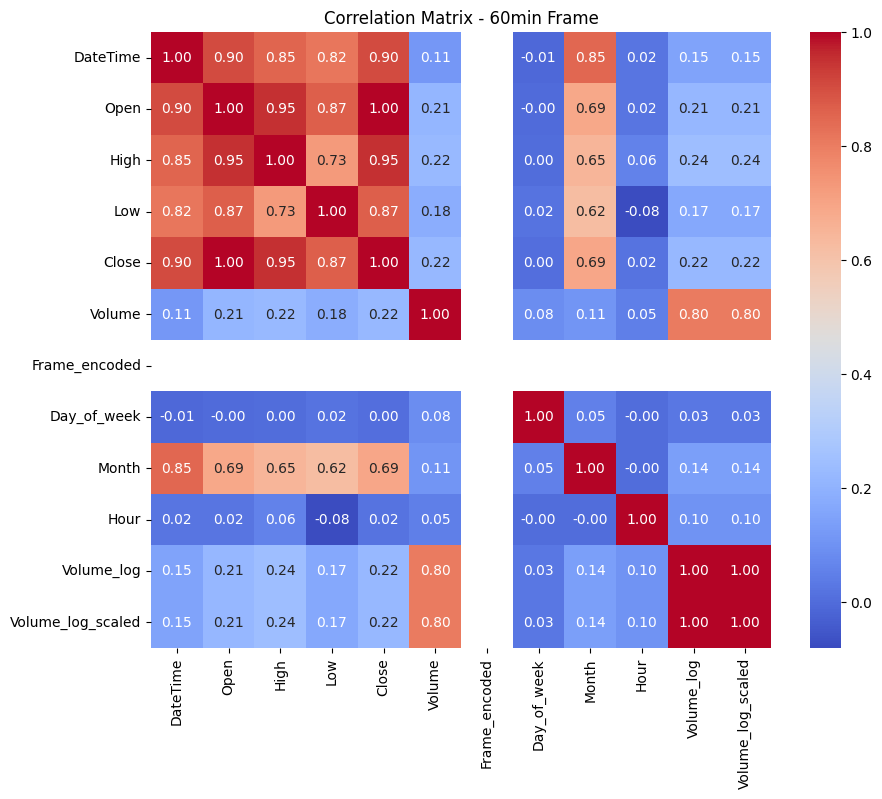

Correlation Matrix for Daily Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.538474  0.537227  0.539769  0.538188  0.681101   
Open               0.538474  1.000000  0.999462  0.999329  0.998686  0.038394   
High               0.537227  0.999462  1.000000  0.999189  0.999377  0.040846   
Low                0.539769  0.999329  0.999189  1.000000  0.999432  0.036013   
Close              0.538188  0.998686  0.999377  0.999432  1.000000  0.038812   
Volume             0.681101  0.038394  0.040846  0.036013  0.038812  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week        0.000317 -0.002798 -0.005588 -0.002847 -0.005323  0.003519   
Month             -0.002865 -0.036144 -0.037426 -0.034642 -0.035634 -0.013727   
Hour                    NaN       NaN       NaN       NaN       NaN       NaN   
Volume_log         0.884653  0.395527  0.397019  0.393929  0.395508  0.80

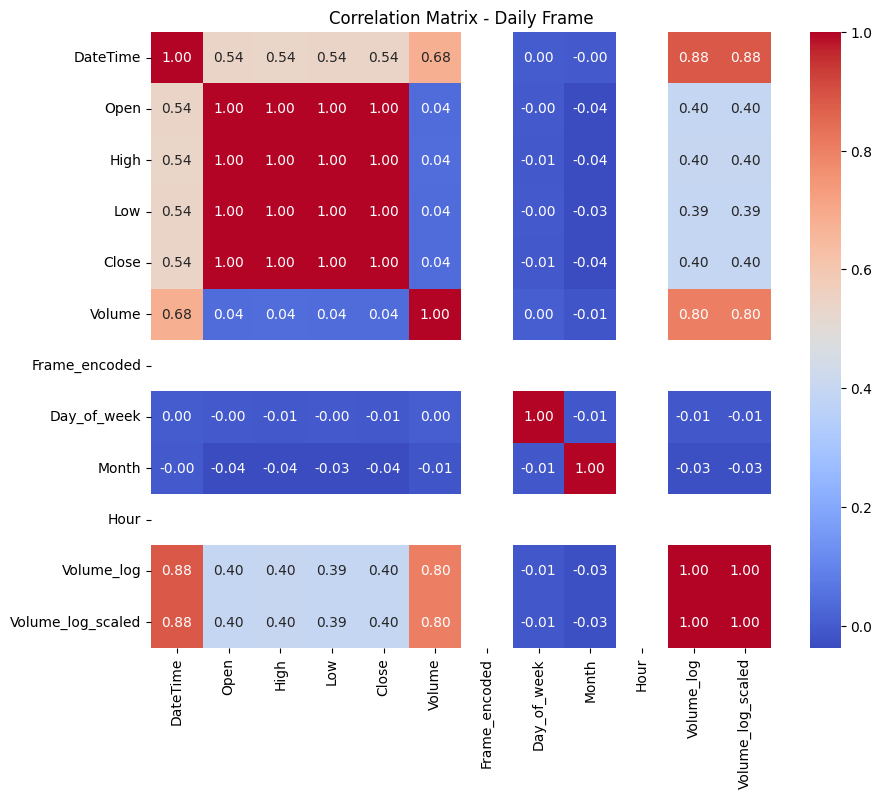

Correlation Matrix for Monthly Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.562606  0.525715  0.569842  0.559176  0.709975   
Open               0.562606  1.000000  0.970793  0.932116  0.912203  0.054276   
High               0.525715  0.970793  1.000000  0.896443  0.897853  0.048580   
Low                0.569842  0.932116  0.896443  1.000000  0.985751  0.042628   
Close              0.559176  0.912203  0.897853  0.985751  1.000000  0.054242   
Volume             0.709975  0.054276  0.048580  0.042628  0.054242  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week        0.018819 -0.025510 -0.020877  0.050059  0.040303 -0.009207   
Month              0.001383 -0.039439 -0.038648 -0.034646 -0.042461 -0.007539   
Hour                    NaN       NaN       NaN       NaN       NaN       NaN   
Volume_log         0.910800  0.432997  0.408279  0.430105  0.430886  0.

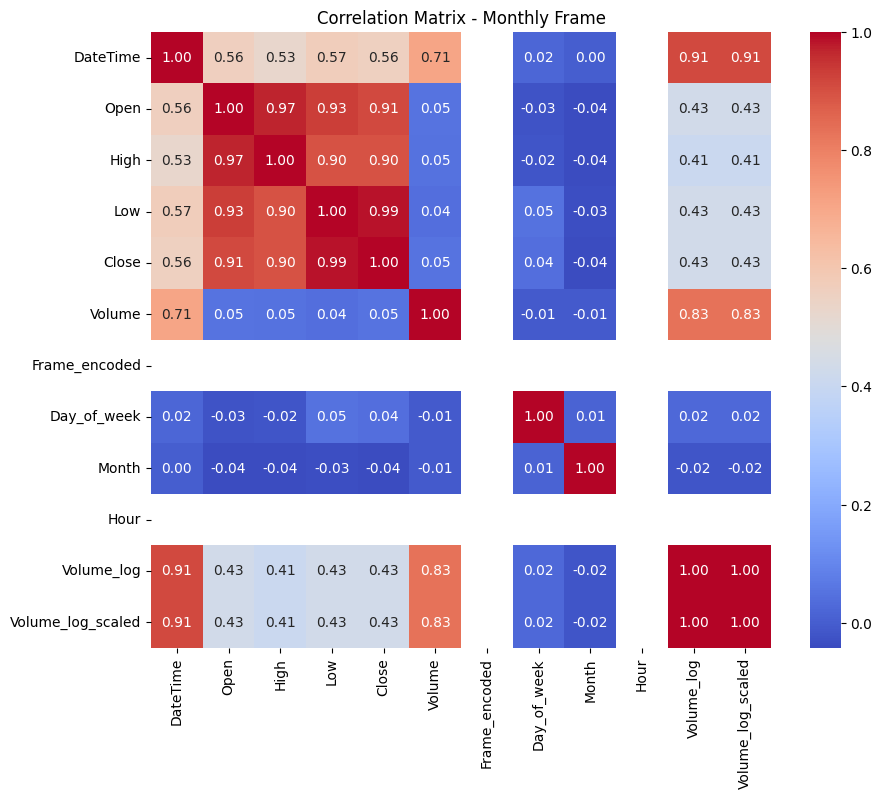

Correlation Matrix for Weekly Frame:
                   DateTime      Open      High       Low     Close    Volume  \
DateTime           1.000000  0.543542  0.535715  0.541518  0.534117  0.697310   
Open               0.543542  1.000000  0.996165  0.994039  0.989017  0.041677   
High               0.535715  0.996165  1.000000  0.993258  0.994241  0.045669   
Low                0.541518  0.994039  0.993258  1.000000  0.995843  0.035634   
Close              0.534117  0.989017  0.994241  0.995843  1.000000  0.040554   
Volume             0.697310  0.041677  0.045669  0.035634  0.040554  1.000000   
Frame_encoded           NaN       NaN       NaN       NaN       NaN       NaN   
Day_of_week       -0.022712 -0.038379 -0.041803 -0.042028 -0.048801  0.025319   
Month              0.001036 -0.033711 -0.035685 -0.030222 -0.029536 -0.006501   
Hour                    NaN       NaN       NaN       NaN       NaN       NaN   
Volume_log         0.897695  0.405955  0.404691  0.399186  0.399111  0.8

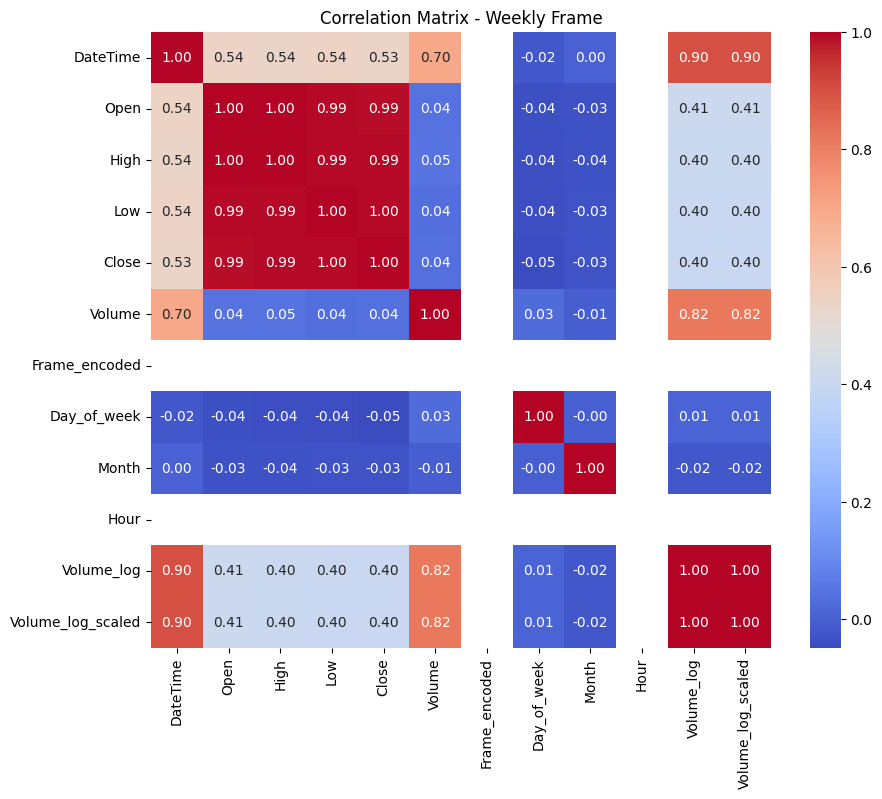

In [56]:
for frame, frame_data in data_by_frame.items():
    print(f"Correlation Matrix for {frame} Frame:")
    correlation_matrix = frame_data.corr()
    print(correlation_matrix)
    
    # رسم Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix - {frame} Frame')
    plt.show()


Data Training

In [58]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/processed/1min_preprocessed.csv')



features = ['Open', 'High', 'Low', 'Volume_log']  
target = 'Close'

X = data[features]
y = data[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Testing Set: {X_test.shape}")





Training Set: (14784, 4)
Validation Set: (3168, 4)
Testing Set: (3168, 4)


Random Forest Model For fream 1min


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf}")
print(f"Validation R² Score: {val_r2_rf}")

Random Forest Regressor:
Validation MSE: 1.3233008609601156
Validation R² Score: 0.9992671355503432


DecisionTree model for 1min

In [60]:
from sklearn.tree import DecisionTreeRegressor

# تدريب Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# التقييم على مجموعة التحقق
y_val_pred_dt = dt_model.predict(X_val)
val_mse_dt = mean_squared_error(y_val, y_val_pred_dt)
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt}")
print(f"Validation R² Score: {val_r2_dt}")


Decision Tree Regressor:
Validation MSE: 1.9854067664362376
Validation R² Score: 0.9989004510764291


GradientBoostingRegressor for 1min

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_val_pred_gb = gb_model.predict(X_val)
val_mse_gb = mean_squared_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb}")
print(f"Validation R² Score: {val_r2_gb}")


Gradient Boosting Regressor:
Validation MSE: 3.092667245614646
Validation R² Score: 0.9982872331260447


PolynomialFeatures for  1min


In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

pr_model = LinearRegression()
pr_model.fit(X_train_poly, y_train)

y_val_pred_pr = pr_model.predict(X_val_poly)
val_mse_pr = mean_squared_error(y_val, y_val_pred_pr)
val_r2_pr = r2_score(y_val, y_val_pred_pr)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr}")
print(f"Validation R² Score: {val_r2_pr}")


Polynomial Regression:
Validation MSE: 1.7450152466573332
Validation R² Score: 0.9990335836119261


In [63]:

y_test_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
y_test_pred_dt = dt_model.predict(X_test)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)
y_test_pred_gb = gb_model.predict(X_test)
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)
y_test_pred_pr = pr_model.predict(X_test_poly)
test_mse_pr = mean_squared_error(y_test, y_test_pred_pr)
test_r2_pr = r2_score(y_test, y_test_pred_pr)
print("\nTest Results:")
print(f"Random Forest - MSE: {test_mse_rf}, R²: {test_r2_rf}")
print(f"Decision Tree - MSE: {test_mse_dt}, R²: {test_r2_dt}")
print(f"Gradient Boosting - MSE: {test_mse_gb}, R²: {test_r2_gb}")
print(f"Polynomial Regression - MSE: {test_mse_pr}, R²: {test_r2_pr}")



Test Results:
Random Forest - MSE: 1.6962357973498665, R²: 0.9990696779735713
Decision Tree - MSE: 3.55820498797033, R²: 0.9980484573665823
Gradient Boosting - MSE: 2.5476476788272775, R²: 0.9986027103337306
Polynomial Regression - MSE: 1.306171276088133, R²: 0.9992836138051491


In [64]:
import joblib

joblib.dump(pr_model, 'backend/models/1min_best_model_polynomial_regression.pkl')
print("Best model (Polynomial Regression) saved as 1min_best_model_polynomial_regression.pkl")


Best model (Polynomial Regression) saved as 1min_best_model_polynomial_regression.pkl


In [65]:
# # استرجاع النموذج المحفوظ
# best_model = joblib.load('1min_best_model_polynomial_regression.pkl')

# # استخدام النموذج للتنبؤ
# predictions = best_model.predict(X_test_poly)  # استخدم X_test_poly لأن Polynomial Regression يحتاج الميزات المتعددة الحدود
# print(predictions[:5])  # طباعة أول 5 تنبؤات

5min Frame

In [66]:
data_5minframe = pd.read_csv('data/processed/5min_preprocessed.csv')

In [67]:
from sklearn.model_selection import train_test_split

X = data_5minframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y = data_5minframe['Close']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (2956, 10)
Validation Set: (634, 10)
Testing Set: (634, 10)


Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf}")
print(f"Validation R² Score: {val_r2_rf}")


Random Forest Regressor:
Validation MSE: 0.6670627564918297
Validation R² Score: 0.9996351075882034


Gradient Boosting Regressor

In [69]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)

y_val_pred_gb = gb_model.predict(X_val)
val_mse_gb = mean_squared_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb}")
print(f"Validation R² Score: {val_r2_gb}")

Gradient Boosting Regressor:
Validation MSE: 0.8691148882899766
Validation R² Score: 0.9995245823205836


Decision Tree Regressor

In [70]:
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

y_val_pred_dt = dt_model.predict(X_val)
val_mse_dt = mean_squared_error(y_val, y_val_pred_dt)
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt}")
print(f"Validation R² Score: {val_r2_dt}")

Decision Tree Regressor:
Validation MSE: 1.8702829049772762
Validation R² Score: 0.9989769297816473


Polynomial Regression

In [71]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

pr_model = LinearRegression()
pr_model.fit(X_train_poly, y_train)

y_val_pred_pr = pr_model.predict(X_val_poly)
val_mse_pr = mean_squared_error(y_val, y_val_pred_pr)
val_r2_pr = r2_score(y_val, y_val_pred_pr)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr}")
print(f"Validation R² Score: {val_r2_pr}")

Polynomial Regression:
Validation MSE: 104.11550824813688
Validation R² Score: 0.9430473991534353


In [72]:
print("\nValidation Results:")
print(f"Random Forest - MSE: {val_mse_rf}, R²: {val_r2_rf}")
print(f"Gradient Boosting - MSE: {val_mse_gb}, R²: {val_r2_gb}")
print(f"Decision Tree - MSE: {val_mse_dt}, R²: {val_r2_dt}")
print(f"Polynomial Regression - MSE: {val_mse_pr}, R²: {val_r2_pr}")



Validation Results:
Random Forest - MSE: 0.6670627564918297, R²: 0.9996351075882034
Gradient Boosting - MSE: 0.8691148882899766, R²: 0.9995245823205836
Decision Tree - MSE: 1.8702829049772762, R²: 0.9989769297816473
Polynomial Regression - MSE: 104.11550824813688, R²: 0.9430473991534353


In [73]:
y_test_pred = rf_model.predict(X_test)  # استبدل rf_model بالنموذج الأفضل
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Results for Best Model:")
print(f"Test MSE: {test_mse}")
print(f"Test R² Score: {test_r2}")



Test Results for Best Model:
Test MSE: 0.7173678483273118
Test R² Score: 0.9995839596247814


In [74]:

joblib.dump(rf_model, 'backend/models/5min_best_model_random_forest.pkl')
print("Best model saved as 5min_best_model_random_forest.pkl")


Best model saved as 5min_best_model_random_forest.pkl


model for frame 15min

In [75]:
data_15minframe = pd.read_csv('data/processed/15min_preprocessed.csv')

In [76]:
X = data_15minframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y = data_15minframe['Close']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (985, 10)
Validation Set: (211, 10)
Testing Set: (212, 10)


Random Forest for 15min frame

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf}")
print(f"Validation R² Score: {val_r2_rf}")

Random Forest Regressor:
Validation MSE: 1.6909762540196605
Validation R² Score: 0.999061078890993


Gradient Boosting Regressor

In [78]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)

y_val_pred_gb = gb_model.predict(X_val)
val_mse_gb = mean_squared_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb}")
print(f"Validation R² Score: {val_r2_gb}")

Gradient Boosting Regressor:
Validation MSE: 2.286920148142774
Validation R² Score: 0.9987301787375191


Decision Tree Regressor

In [79]:
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

y_val_pred_dt = dt_model.predict(X_val)
val_mse_dt = mean_squared_error(y_val, y_val_pred_dt)
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt}")
print(f"Validation R² Score: {val_r2_dt}")

Decision Tree Regressor:
Validation MSE: 3.3530561353893367
Validation R² Score: 0.9981382026047271


Polynomial Regression

In [80]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

pr_model = LinearRegression()
pr_model.fit(X_train_poly, y_train)

y_val_pred_pr = pr_model.predict(X_val_poly)
val_mse_pr = mean_squared_error(y_val, y_val_pred_pr)
val_r2_pr = r2_score(y_val, y_val_pred_pr)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr}")
print(f"Validation R² Score: {val_r2_pr}")

Polynomial Regression:
Validation MSE: 183.0184768935167
Validation R² Score: 0.8983782824358802


In [81]:
print("\nValidation Results:")
print(f"Random Forest - MSE: {val_mse_rf}, R²: {val_r2_rf}")
print(f"Gradient Boosting - MSE: {val_mse_gb}, R²: {val_r2_gb}")
print(f"Decision Tree - MSE: {val_mse_dt}, R²: {val_r2_dt}")
print(f"Polynomial Regression - MSE: {val_mse_pr}, R²: {val_r2_pr}")


Validation Results:
Random Forest - MSE: 1.6909762540196605, R²: 0.999061078890993
Gradient Boosting - MSE: 2.286920148142774, R²: 0.9987301787375191
Decision Tree - MSE: 3.3530561353893367, R²: 0.9981382026047271
Polynomial Regression - MSE: 183.0184768935167, R²: 0.8983782824358802


In [82]:
joblib.dump(rf_model, 'backend/models/15min_best_model_random_forest.pkl')  # استبدل بالنموذج الأفضل
print("Best model saved as 15min_best_model_random_forest.pkl")

Best model saved as 15min_best_model_random_forest.pkl


30min frame 

In [83]:
data_30minframe = pd.read_csv('data/processed/30min_preprocessed.csv')

In [84]:
X_30min = data_30minframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y_30min = data_30minframe['Close']

X_train_30min, X_temp_30min, y_train_30min, y_temp_30min = train_test_split(X_30min, y_30min, test_size=0.3, random_state=42)
X_val_30min, X_test_30min, y_val_30min, y_test_30min = train_test_split(X_temp_30min, y_temp_30min, test_size=0.5, random_state=42)

print(f"Training Set: {X_train_30min.shape}")
print(f"Validation Set: {X_val_30min.shape}")
print(f"Testing Set: {X_test_30min.shape}")

Training Set: (492, 10)
Validation Set: (106, 10)
Testing Set: (106, 10)


In [85]:
rf_model_30min = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model_30min.fit(X_train_30min, y_train_30min)

y_val_pred_rf_30min = rf_model_30min.predict(X_val_30min)
val_mse_rf_30min = mean_squared_error(y_val_30min, y_val_pred_rf_30min)
val_r2_rf_30min = r2_score(y_val_30min, y_val_pred_rf_30min)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf_30min}")
print(f"Validation R² Score: {val_r2_rf_30min}")

Random Forest Regressor:
Validation MSE: 3.4294604816601106
Validation R² Score: 0.9981400164810166


In [86]:
gb_model_30min = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model_30min.fit(X_train_30min, y_train_30min)

y_val_pred_gb_30min = gb_model_30min.predict(X_val_30min)
val_mse_gb_30min = mean_squared_error(y_val_30min, y_val_pred_gb_30min)
val_r2_gb_30min = r2_score(y_val_30min, y_val_pred_gb_30min)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb_30min}")
print(f"Validation R² Score: {val_r2_gb_30min}")

Gradient Boosting Regressor:
Validation MSE: 4.5280548999883985
Validation R² Score: 0.9975441887923567


In [87]:
dt_model_30min = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model_30min.fit(X_train_30min, y_train_30min)

y_val_pred_dt_30min = dt_model_30min.predict(X_val_30min)
val_mse_dt_30min = mean_squared_error(y_val_30min, y_val_pred_dt_30min)
val_r2_dt_30min = r2_score(y_val_30min, y_val_pred_dt_30min)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt_30min}")
print(f"Validation R² Score: {val_r2_dt_30min}")

Decision Tree Regressor:
Validation MSE: 5.646474110291361
Validation R² Score: 0.9969376090374353


In [88]:
poly_30min = PolynomialFeatures(degree=3)
X_train_poly_30min = poly_30min.fit_transform(X_train_30min)
X_val_poly_30min = poly_30min.transform(X_val_30min)
X_test_poly_30min = poly_30min.transform(X_test_30min)

pr_model_30min = LinearRegression()
pr_model_30min.fit(X_train_poly_30min, y_train_30min)

y_val_pred_pr_30min = pr_model_30min.predict(X_val_poly_30min)
val_mse_pr_30min = mean_squared_error(y_val_30min, y_val_pred_pr_30min)
val_r2_pr_30min = r2_score(y_val_30min, y_val_pred_pr_30min)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr_30min}")
print(f"Validation R² Score: {val_r2_pr_30min}")

Polynomial Regression:
Validation MSE: 642.295265534058
Validation R² Score: 0.6516482360408635


In [89]:
print("\nValidation Results for 30min Frame:")
print(f"Random Forest - MSE: {val_mse_rf_30min}, R²: {val_r2_rf_30min}")
print(f"Gradient Boosting - MSE: {val_mse_gb_30min}, R²: {val_r2_gb_30min}")
print(f"Decision Tree - MSE: {val_mse_dt_30min}, R²: {val_r2_dt_30min}")
print(f"Polynomial Regression - MSE: {val_mse_pr_30min}, R²: {val_r2_pr_30min}")



Validation Results for 30min Frame:
Random Forest - MSE: 3.4294604816601106, R²: 0.9981400164810166
Gradient Boosting - MSE: 4.5280548999883985, R²: 0.9975441887923567
Decision Tree - MSE: 5.646474110291361, R²: 0.9969376090374353
Polynomial Regression - MSE: 642.295265534058, R²: 0.6516482360408635


In [90]:
joblib.dump(rf_model_30min, 'backend/models/30min_best_model_random_forest.pkl')  # استبدل بالنموذج الأفضل
print("Model saved as 30min_best_model_random_forest.pkl")

Model saved as 30min_best_model_random_forest.pkl


60Min


In [91]:
data_60minframe = pd.read_csv('data/processed/60min_preprocessed.csv')

In [92]:
X_60min = data_60minframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y_60min = data_60minframe['Close']

X_train_60min, X_temp_60min, y_train_60min, y_temp_60min = train_test_split(X_60min, y_60min, test_size=0.3, random_state=42)
X_val_60min, X_test_60min, y_val_60min, y_test_60min = train_test_split(X_temp_60min, y_temp_60min, test_size=0.5, random_state=42)

print(f"Training Set: {X_train_60min.shape}")
print(f"Validation Set: {X_val_60min.shape}")
print(f"Testing Set: {X_test_60min.shape}")

Training Set: (246, 10)
Validation Set: (53, 10)
Testing Set: (53, 10)


In [93]:
rf_model_60min = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model_60min.fit(X_train_60min, y_train_60min)

y_val_pred_rf_60min = rf_model_60min.predict(X_val_60min)
val_mse_rf_60min = mean_squared_error(y_val_60min, y_val_pred_rf_60min)
val_r2_rf_60min = r2_score(y_val_60min, y_val_pred_rf_60min)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf_60min}")
print(f"Validation R² Score: {val_r2_rf_60min}")

Random Forest Regressor:
Validation MSE: 5.610860914252629
Validation R² Score: 0.9970105774259616


In [94]:
gb_model_60min = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model_60min.fit(X_train_60min, y_train_60min)

y_val_pred_gb_60min = gb_model_60min.predict(X_val_60min)
val_mse_gb_60min = mean_squared_error(y_val_60min, y_val_pred_gb_60min)
val_r2_gb_60min = r2_score(y_val_60min, y_val_pred_gb_60min)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb_60min}")
print(f"Validation R² Score: {val_r2_gb_60min}")

Gradient Boosting Regressor:
Validation MSE: 7.172680513821303
Validation R² Score: 0.9961784522246995


In [95]:
dt_model_60min = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model_60min.fit(X_train_60min, y_train_60min)

y_val_pred_dt_60min = dt_model_60min.predict(X_val_60min)
val_mse_dt_60min = mean_squared_error(y_val_60min, y_val_pred_dt_60min)
val_r2_dt_60min = r2_score(y_val_60min, y_val_pred_dt_60min)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt_60min}")
print(f"Validation R² Score: {val_r2_dt_60min}")

Decision Tree Regressor:
Validation MSE: 8.790172573694985
Validation R² Score: 0.995316665174368


In [96]:
poly_60min = PolynomialFeatures(degree=3)
X_train_poly_60min = poly_60min.fit_transform(X_train_60min)
X_val_poly_60min = poly_60min.transform(X_val_60min)
X_test_poly_60min = poly_60min.transform(X_test_60min)

pr_model_60min = LinearRegression()
pr_model_60min.fit(X_train_poly_60min, y_train_60min)

y_val_pred_pr_60min = pr_model_60min.predict(X_val_poly_60min)
val_mse_pr_60min = mean_squared_error(y_val_60min, y_val_pred_pr_60min)
val_r2_pr_60min = r2_score(y_val_60min, y_val_pred_pr_60min)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr_60min}")
print(f"Validation R² Score: {val_r2_pr_60min}")

Polynomial Regression:
Validation MSE: 271.8736156124992
Validation R² Score: 0.8551478754832579


In [97]:
print("\nValidation Results for 60min Frame:")
print(f"Random Forest - MSE: {val_mse_rf_60min}, R²: {val_r2_rf_60min}")
print(f"Gradient Boosting - MSE: {val_mse_gb_60min}, R²: {val_r2_gb_60min}")
print(f"Decision Tree - MSE: {val_mse_dt_60min}, R²: {val_r2_dt_60min}")
print(f"Polynomial Regression - MSE: {val_mse_pr_60min}, R²: {val_r2_pr_60min}")



Validation Results for 60min Frame:
Random Forest - MSE: 5.610860914252629, R²: 0.9970105774259616
Gradient Boosting - MSE: 7.172680513821303, R²: 0.9961784522246995
Decision Tree - MSE: 8.790172573694985, R²: 0.995316665174368
Polynomial Regression - MSE: 271.8736156124992, R²: 0.8551478754832579


In [98]:
joblib.dump(rf_model_60min, 'backend/models/60min_best_model_random_forest.pkl')  # استبدل بالنموذج الأفضل
print("Model saved as 60min_best_model_random_forest.pkl")

Model saved as 60min_best_model_random_forest.pkl


Daily

In [100]:
data_dailyframe = pd.read_csv('data/processed/Daily_preprocessed.csv')

In [101]:
X_daily = data_dailyframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y_daily = data_dailyframe['Close']

X_train_daily, X_temp_daily, y_train_daily, y_temp_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=42)
X_val_daily, X_test_daily, y_val_daily, y_test_daily = train_test_split(X_temp_daily, y_temp_daily, test_size=0.5, random_state=42)

print(f"Training Set: {X_train_daily.shape}")
print(f"Validation Set: {X_val_daily.shape}")
print(f"Testing Set: {X_test_daily.shape}")

Training Set: (2537, 10)
Validation Set: (544, 10)
Testing Set: (544, 10)


In [102]:
rf_model_daily = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model_daily.fit(X_train_daily, y_train_daily)

y_val_pred_rf_daily = rf_model_daily.predict(X_val_daily)
val_mse_rf_daily = mean_squared_error(y_val_daily, y_val_pred_rf_daily)
val_r2_rf_daily = r2_score(y_val_daily, y_val_pred_rf_daily)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf_daily}")
print(f"Validation R² Score: {val_r2_rf_daily}")

Random Forest Regressor:
Validation MSE: 87.74349688080287
Validation R² Score: 0.9987198767199885


In [103]:
gb_model_daily = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model_daily.fit(X_train_daily, y_train_daily)

y_val_pred_gb_daily = gb_model_daily.predict(X_val_daily)
val_mse_gb_daily = mean_squared_error(y_val_daily, y_val_pred_gb_daily)
val_r2_gb_daily = r2_score(y_val_daily, y_val_pred_gb_daily)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb_daily}")
print(f"Validation R² Score: {val_r2_gb_daily}")

Gradient Boosting Regressor:
Validation MSE: 88.39444048721145
Validation R² Score: 0.9987103798558998


In [104]:
dt_model_daily = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model_daily.fit(X_train_daily, y_train_daily)

y_val_pred_dt_daily = dt_model_daily.predict(X_val_daily)
val_mse_dt_daily = mean_squared_error(y_val_daily, y_val_pred_dt_daily)
val_r2_dt_daily = r2_score(y_val_daily, y_val_pred_dt_daily)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt_daily}")
print(f"Validation R² Score: {val_r2_dt_daily}")

Decision Tree Regressor:
Validation MSE: 286.62304040689986
Validation R² Score: 0.9958183473458894


In [105]:
poly_daily = PolynomialFeatures(degree=3)
X_train_poly_daily = poly_daily.fit_transform(X_train_daily)
X_val_poly_daily = poly_daily.transform(X_val_daily)
X_test_poly_daily = poly_daily.transform(X_test_daily)

pr_model_daily = LinearRegression()
pr_model_daily.fit(X_train_poly_daily, y_train_daily)

y_val_pred_pr_daily = pr_model_daily.predict(X_val_poly_daily)
val_mse_pr_daily = mean_squared_error(y_val_daily, y_val_pred_pr_daily)
val_r2_pr_daily = r2_score(y_val_daily, y_val_pred_pr_daily)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr_daily}")
print(f"Validation R² Score: {val_r2_pr_daily}")

Polynomial Regression:
Validation MSE: 12615.80510426026
Validation R² Score: 0.8159432164871332


In [106]:
print("\nValidation Results for Daily Frame:")
print(f"Random Forest - MSE: {val_mse_rf_daily}, R²: {val_r2_rf_daily}")
print(f"Gradient Boosting - MSE: {val_mse_gb_daily}, R²: {val_r2_gb_daily}")
print(f"Decision Tree - MSE: {val_mse_dt_daily}, R²: {val_r2_dt_daily}")
print(f"Polynomial Regression - MSE: {val_mse_pr_daily}, R²: {val_r2_pr_daily}")


Validation Results for Daily Frame:
Random Forest - MSE: 87.74349688080287, R²: 0.9987198767199885
Gradient Boosting - MSE: 88.39444048721145, R²: 0.9987103798558998
Decision Tree - MSE: 286.62304040689986, R²: 0.9958183473458894
Polynomial Regression - MSE: 12615.80510426026, R²: 0.8159432164871332


In [107]:
y_test_pred_rf_daily = rf_model_daily.predict(X_test_daily)
test_mse_rf_daily = mean_squared_error(y_test_daily, y_test_pred_rf_daily)
test_r2_rf_daily = r2_score(y_test_daily, y_test_pred_rf_daily)

In [108]:
joblib.dump(rf_model_daily, 'backend/models/daily_best_model_random_forest.pkl')  # استبدل بالنموذج الأفضل
print("Model saved as daily_best_model_random_forest.pkl")

Model saved as daily_best_model_random_forest.pkl


Weekly

In [110]:
data_weeklyframe = pd.read_csv('data/processed/Weekly_preprocessed.csv')

In [111]:
X_weekly = data_weeklyframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y_weekly = data_weeklyframe['Close']

X_train_weekly, X_temp_weekly, y_train_weekly, y_temp_weekly = train_test_split(X_weekly, y_weekly, test_size=0.3, random_state=42)
X_val_weekly, X_test_weekly, y_val_weekly, y_test_weekly = train_test_split(X_temp_weekly, y_temp_weekly, test_size=0.5, random_state=42)

print(f"Training Set: {X_train_weekly.shape}")
print(f"Validation Set: {X_val_weekly.shape}")
print(f"Testing Set: {X_test_weekly.shape}")

Training Set: (525, 10)
Validation Set: (113, 10)
Testing Set: (113, 10)


In [112]:
rf_model_weekly = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model_weekly.fit(X_train_weekly, y_train_weekly)

y_val_pred_rf_weekly = rf_model_weekly.predict(X_val_weekly)
val_mse_rf_weekly = mean_squared_error(y_val_weekly, y_val_pred_rf_weekly)
val_r2_rf_weekly = r2_score(y_val_weekly, y_val_pred_rf_weekly)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf_weekly}")
print(f"Validation R² Score: {val_r2_rf_weekly}")

Random Forest Regressor:
Validation MSE: 2010.5900448626046
Validation R² Score: 0.9785395775935586


In [113]:
gb_model_weekly = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model_weekly.fit(X_train_weekly, y_train_weekly)

y_val_pred_gb_weekly = gb_model_weekly.predict(X_val_weekly)
val_mse_gb_weekly = mean_squared_error(y_val_weekly, y_val_pred_gb_weekly)
val_r2_gb_weekly = r2_score(y_val_weekly, y_val_pred_gb_weekly)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb_weekly}")
print(f"Validation R² Score: {val_r2_gb_weekly}")

Gradient Boosting Regressor:
Validation MSE: 679.4122933181117
Validation R² Score: 0.9927481612474949


In [114]:
dt_model_weekly = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model_weekly.fit(X_train_weekly, y_train_weekly)

y_val_pred_dt_weekly = dt_model_weekly.predict(X_val_weekly)
val_mse_dt_weekly = mean_squared_error(y_val_weekly, y_val_pred_dt_weekly)
val_r2_dt_weekly = r2_score(y_val_weekly, y_val_pred_dt_weekly)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt_weekly}")
print(f"Validation R² Score: {val_r2_dt_weekly}")

Decision Tree Regressor:
Validation MSE: 1082.2029121887256
Validation R² Score: 0.9884488975341374


In [115]:

poly_weekly = PolynomialFeatures(degree=3)
X_train_poly_weekly = poly_weekly.fit_transform(X_train_weekly)
X_val_poly_weekly = poly_weekly.transform(X_val_weekly)
X_test_poly_weekly = poly_weekly.transform(X_test_weekly)

pr_model_weekly = LinearRegression()
pr_model_weekly.fit(X_train_poly_weekly, y_train_weekly)

y_val_pred_pr_weekly = pr_model_weekly.predict(X_val_poly_weekly)
val_mse_pr_weekly = mean_squared_error(y_val_weekly, y_val_pred_pr_weekly)
val_r2_pr_weekly = r2_score(y_val_weekly, y_val_pred_pr_weekly)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr_weekly}")
print(f"Validation R² Score: {val_r2_pr_weekly}")

Polynomial Regression:
Validation MSE: 49312.64631021257
Validation R² Score: 0.47365191501834836


In [116]:
print("\nValidation Results for Weekly Frame:")
print(f"Random Forest - MSE: {val_mse_rf_weekly}, R²: {val_r2_rf_weekly}")
print(f"Gradient Boosting - MSE: {val_mse_gb_weekly}, R²: {val_r2_gb_weekly}")
print(f"Decision Tree - MSE: {val_mse_dt_weekly}, R²: {val_r2_dt_weekly}")
print(f"Polynomial Regression - MSE: {val_mse_pr_weekly}, R²: {val_r2_pr_weekly}")


Validation Results for Weekly Frame:
Random Forest - MSE: 2010.5900448626046, R²: 0.9785395775935586
Gradient Boosting - MSE: 679.4122933181117, R²: 0.9927481612474949
Decision Tree - MSE: 1082.2029121887256, R²: 0.9884488975341374
Polynomial Regression - MSE: 49312.64631021257, R²: 0.47365191501834836


In [117]:

joblib.dump(rf_model_weekly, 'backend/models/weekly_best_model_random_forest.pkl')  # استبدل بالنموذج الأفضل
print("Model saved as weekly_best_model_random_forest.pkl")


Model saved as weekly_best_model_random_forest.pkl


Monthly Frame

In [118]:
data_monthlyframe = pd.read_csv('data/processed/Monthly_preprocessed.csv')

In [119]:

X_monthly = data_monthlyframe.drop(columns=['Close', 'DateTime'])  # إزالة الأعمدة غير ذات الصلة
y_monthly = data_monthlyframe['Close']

X_train_monthly, X_temp_monthly, y_train_monthly, y_temp_monthly = train_test_split(X_monthly, y_monthly, test_size=0.3, random_state=42)
X_val_monthly, X_test_monthly, y_val_monthly, y_test_monthly = train_test_split(X_temp_monthly, y_temp_monthly, test_size=0.5, random_state=42)

print(f"Training Set: {X_train_monthly.shape}")
print(f"Validation Set: {X_val_monthly.shape}")
print(f"Testing Set: {X_test_monthly.shape}")

Training Set: (121, 10)
Validation Set: (26, 10)
Testing Set: (26, 10)


In [120]:
rf_model_monthly = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model_monthly.fit(X_train_monthly, y_train_monthly)

y_val_pred_rf_monthly = rf_model_monthly.predict(X_val_monthly)
val_mse_rf_monthly = mean_squared_error(y_val_monthly, y_val_pred_rf_monthly)
val_r2_rf_monthly = r2_score(y_val_monthly, y_val_pred_rf_monthly)

print("Random Forest Regressor:")
print(f"Validation MSE: {val_mse_rf_monthly}")
print(f"Validation R² Score: {val_r2_rf_monthly}")

Random Forest Regressor:
Validation MSE: 2042.3642774831444
Validation R² Score: 0.9578139204301833


In [121]:
gb_model_monthly = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
gb_model_monthly.fit(X_train_monthly, y_train_monthly)

y_val_pred_gb_monthly = gb_model_monthly.predict(X_val_monthly)
val_mse_gb_monthly = mean_squared_error(y_val_monthly, y_val_pred_gb_monthly)
val_r2_gb_monthly = r2_score(y_val_monthly, y_val_pred_gb_monthly)

print("Gradient Boosting Regressor:")
print(f"Validation MSE: {val_mse_gb_monthly}")
print(f"Validation R² Score: {val_r2_gb_monthly}")

Gradient Boosting Regressor:
Validation MSE: 2429.302856210267
Validation R² Score: 0.9498215060255748


In [122]:
dt_model_monthly = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model_monthly.fit(X_train_monthly, y_train_monthly)

y_val_pred_dt_monthly = dt_model_monthly.predict(X_val_monthly)
val_mse_dt_monthly = mean_squared_error(y_val_monthly, y_val_pred_dt_monthly)
val_r2_dt_monthly = r2_score(y_val_monthly, y_val_pred_dt_monthly)

print("Decision Tree Regressor:")
print(f"Validation MSE: {val_mse_dt_monthly}")
print(f"Validation R² Score: {val_r2_dt_monthly}")

Decision Tree Regressor:
Validation MSE: 4381.5176789797
Validation R² Score: 0.9094975095873798


In [123]:
poly_monthly = PolynomialFeatures(degree=3)
X_train_poly_monthly = poly_monthly.fit_transform(X_train_monthly)
X_val_poly_monthly = poly_monthly.transform(X_val_monthly)
X_test_poly_monthly = poly_monthly.transform(X_test_monthly)

pr_model_monthly = LinearRegression()
pr_model_monthly.fit(X_train_poly_monthly, y_train_monthly)

y_val_pred_pr_monthly = pr_model_monthly.predict(X_val_poly_monthly)
val_mse_pr_monthly = mean_squared_error(y_val_monthly, y_val_pred_pr_monthly)
val_r2_pr_monthly = r2_score(y_val_monthly, y_val_pred_pr_monthly)

print("Polynomial Regression:")
print(f"Validation MSE: {val_mse_pr_monthly}")
print(f"Validation R² Score: {val_r2_pr_monthly}")

Polynomial Regression:
Validation MSE: 20703.554704455444
Validation R² Score: 0.5723574801178346


In [124]:
print("\nValidation Results for Monthly Frame:")
print(f"Random Forest - MSE: {val_mse_rf_monthly}, R²: {val_r2_rf_monthly}")
print(f"Gradient Boosting - MSE: {val_mse_gb_monthly}, R²: {val_r2_gb_monthly}")
print(f"Decision Tree - MSE: {val_mse_dt_monthly}, R²: {val_r2_dt_monthly}")
print(f"Polynomial Regression - MSE: {val_mse_pr_monthly}, R²: {val_r2_pr_monthly}")


Validation Results for Monthly Frame:
Random Forest - MSE: 2042.3642774831444, R²: 0.9578139204301833
Gradient Boosting - MSE: 2429.302856210267, R²: 0.9498215060255748
Decision Tree - MSE: 4381.5176789797, R²: 0.9094975095873798
Polynomial Regression - MSE: 20703.554704455444, R²: 0.5723574801178346


In [125]:
y_test_pred_rf_monthly = rf_model_monthly.predict(X_test_monthly)
test_mse_rf_monthly = mean_squared_error(y_test_monthly, y_test_pred_rf_monthly)
test_r2_rf_monthly = r2_score(y_test_monthly, y_test_pred_rf_monthly)

print("\nTest Results for Random Forest (Monthly Frame):")
print(f"Test MSE: {test_mse_rf_monthly}")
print(f"Test R² Score: {test_r2_rf_monthly}")


Test Results for Random Forest (Monthly Frame):
Test MSE: 1652.0179630287096
Test R² Score: 0.9843621018882868


In [126]:
joblib.dump(rf_model_monthly, 'backend/models/monthly_best_model_random_forest.pkl')  # استبدل بالنموذج الأفضل
print("Model saved as monthly_best_model_random_forest.pkl")

Model saved as monthly_best_model_random_forest.pkl


ALL FRAMES

In [127]:
data_all_frames = pd.read_csv('TSLA_all_supported_frames.csv')

In [128]:
label_encoder = LabelEncoder()
data_all_frames['Frame_encoded'] = label_encoder.fit_transform(data_all_frames['Frame'])

frame_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Frame Mapping:", frame_mapping)

Frame Mapping: {'15min': np.int64(0), '1min': np.int64(1), '30min': np.int64(2), '5min': np.int64(3), '60min': np.int64(4), 'Daily': np.int64(5), 'Monthly': np.int64(6), 'Weekly': np.int64(7)}


In [129]:
data_all_frames.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Frame,Frame_encoded
0,11/19/2024 19:59,344.91,345.00,344.91,344.99,10210,1min,1
1,11/19/2024 19:58,345.04,345.05,344.90,344.99,5771,1min,1
2,11/19/2024 19:57,345.02,345.08,344.81,345.04,5140,1min,1
3,11/19/2024 19:56,345.03,345.04,345.00,345.01,1799,1min,1
4,11/19/2024 19:55,345.00,345.08,345.00,345.00,2259,1min,1


In [130]:
# Rename and convert DateTime column
data_all_frames = data_all_frames.rename(columns={'Unnamed: 0': 'DateTime'})
data_all_frames['DateTime'] = pd.to_datetime(data_all_frames['DateTime'])

In [131]:
X_all = data_all_frames.drop(columns=['Close', 'DateTime', 'Frame', 'Frame_encoded'])  # إزالة 'DateTime' و 'Frame'
y_all = data_all_frames['Close']

from sklearn.model_selection import train_test_split

X_train_all, X_temp_all, y_train_all, y_temp_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)
X_val_all, X_test_all, y_val_all, y_test_all = train_test_split(X_temp_all, y_temp_all, test_size=0.5, random_state=42)

print(f"Training Set: {X_train_all.shape}")
print(f"Validation Set: {X_val_all.shape}")
print(f"Testing Set: {X_test_all.shape}")


Training Set: (22649, 4)
Validation Set: (4854, 4)
Testing Set: (4854, 4)


In [132]:
rf_model_all = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model_all.fit(X_train_all, y_train_all)

y_val_pred_all = rf_model_all.predict(X_val_all)
val_mse_all = mean_squared_error(y_val_all, y_val_pred_all)
val_r2_all = r2_score(y_val_all, y_val_pred_all)

print("Random Forest (All Frames):")
print(f"Validation MSE: {val_mse_all}")
print(f"Validation R² Score: {val_r2_all}")

Random Forest (All Frames):
Validation MSE: 73.20819606354074
Validation R² Score: 0.9947975419420233


In [133]:
y_test_pred_all = rf_model_all.predict(X_test_all)
test_mse_all = mean_squared_error(y_test_all, y_test_pred_all)
test_r2_all = r2_score(y_test_all, y_test_pred_all)

print("\nTest Results (All Frames):")
print(f"Test MSE: {test_mse_all}")
print(f"Test R² Score: {test_r2_all}")



Test Results (All Frames):
Test MSE: 22.156477025304998
Test R² Score: 0.997996094807435


In [134]:
joblib.dump(rf_model_all, 'backend/models/best_model_all_frames.pkl')

['backend/models/best_model_all_frames.pkl']

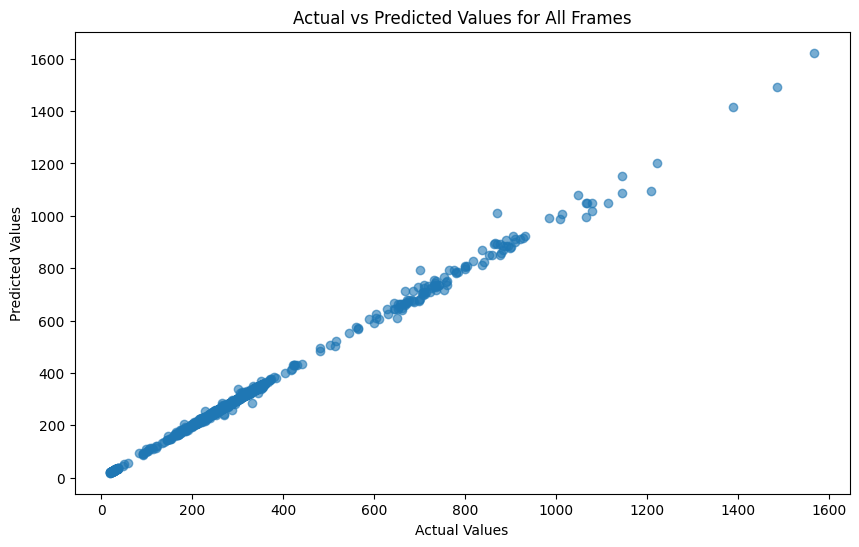

In [135]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test_all, y_test_pred_all, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for All Frames")
plt.show()


In [136]:
# residuals = y_test_all - y_test_pred_all
# high_residuals = residuals[abs(residuals) > threshold]  # Define a threshold
# print(high_residuals)


In [137]:
# from sklearn.svm import SVR

# # svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
# svr_model = SVR(kernel='rbf', C=1000, epsilon=0.01)
# svr_model.fit(X_train_all, y_train_all)

# y_val_pred_svr = svr_model.predict(X_val_all)
# val_mse_svr = mean_squared_error(y_val_all, y_val_pred_svr)
# val_r2_svr = r2_score(y_val_all, y_val_pred_svr)

# print(f"Support Vector Regressor:\nValidation MSE: {val_mse_svr}, R²: {val_r2_svr}")
